# Airlines Customer Satisfaction

## Motivation
Customer loyalty, retention, and revenue growth for airlines are all directly correlated with customer happiness. Large amounts of client data are gathered by airlines from a variety of sources, such as surveys, complaints, and customer feedback. Using this information, one may forecast client satisfaction levels and pinpoint areas for development. Data analysis and insight extraction using data mining techniques can help airlines raise customer satisfaction levels.

## Load Data

In [ ]:
# !unzip ./Invistico_Airline.csv.zip

Archive:  ./Invistico_Airline.csv.zip
  inflating: Invistico_Airline.csv   


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
data = pd.read_csv("Invistico_Airline.csv")
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


## Data Description

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

There are 23 columns in data. Each of them are:   
1. `satisfaction` : whether customer is satisfied with airline or not
1. `Gender`: male or female
1. `Customer type`: loyal or disloyal customer
1. `Age`: the age of the passenger
1. `Type of travel`: the purpose of the passenger's flight (personal or business travel)
1. `Class`: business, economy
1. `Flight distance`: the distance of the flight
1. `Seat comfort`: seat satisfaction level
1. `Departure/Arrival time convenient`: departure/arrival time satisfaction level
1. `Food and drink`: food and drink satisfaction level
1. `Gate location`:  satisfaction level with the gate location
1. `Inflight wifi service`: satisfaction level with Wi-Fi service on board
1. `Inflight entertainment`: satisfaction level with inflight entertainment
1. `Online Support`: satisfaction level with airline's online support
1. `Ease of Online booking`: online booking satisfaction level
1. `On-board service`: satisfaction level with on-board service
1. `Leg room service`: satisfaction level with leg room service
1. `Baggage handling`: satisfaction level with baggage handling
1. `Checkin service`: satisfaction level with checkin service
1. `Cleanliness`: satisfaction level with cleanliness
1. `Online boarding`: satisfaction level with online boarding
1. `Departure delay in minutes`: delay minutes before flight departure
1. `Arrival delay in minutes` : delay minutes of flight arrival
   
All the satisfaction level features are rated from 1(least satisfied) to 5(most satisfied) and 0( not rated) .

In [ ]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Data Exploration

### Mising Data
First thing first, let's check the missing data.

In [ ]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [ ]:
percentage_nullvalues= data.isnull().sum()/len(data)
percentage_nullvalues

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

From the info displayed above, only column `Arrival Delay in Minutes` has some missing data. It's a small partition compared to the entire data. We can drop these records.

In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [ ]:
data.shape

(129487, 23)

### Satisfaction

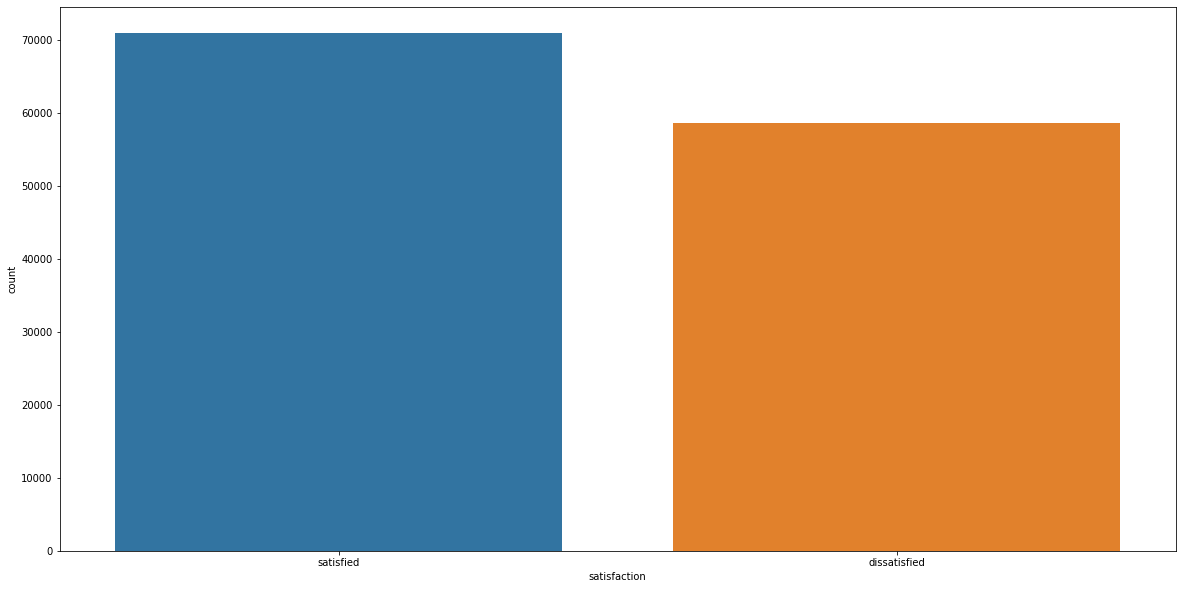

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['satisfaction'])
plt.show()

In [ ]:
fig=px.pie(data,values=data["satisfaction"].value_counts(),
           names=["Satisfied","Dissatisfied"])
fig.show()

Conclusion : from this data, about 54.7% of customers are satisfied with airline's services.   
Next, let's explore the relations between satisfaction and other columns.   
### Gender

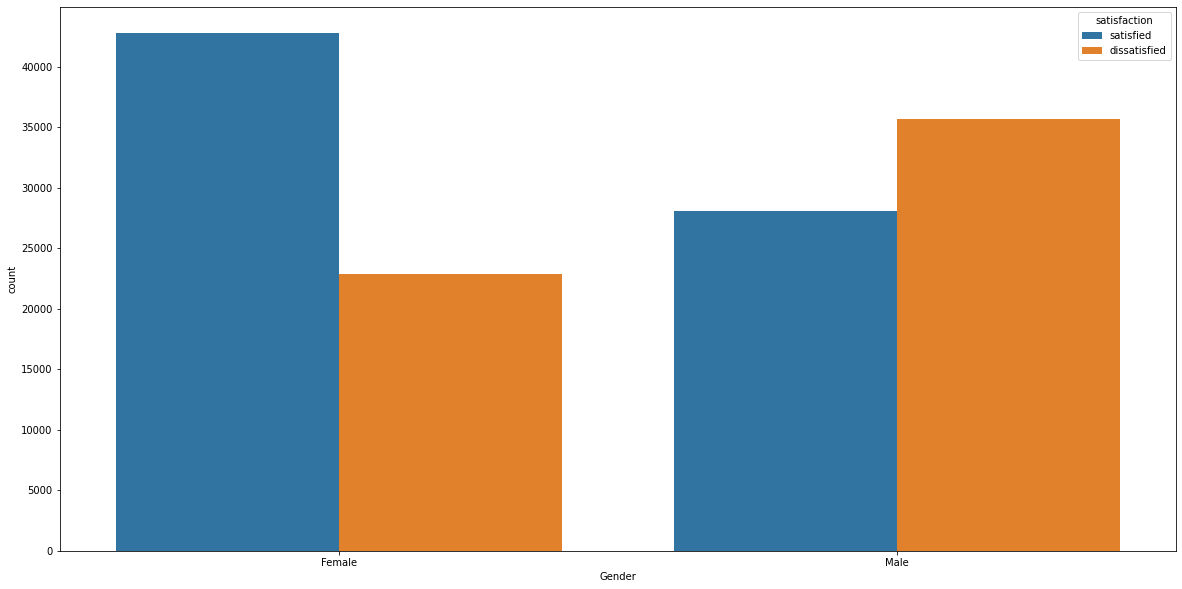

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Gender'],hue=data['satisfaction'])
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Gender', 'satisfaction'])
fig.show()

Conclusion: Overall Female customers are more likely to express a satisfaction about the airline. Men do complain.
Among the entire Female customers more than half are satisfied. Where as we can see that more than half of men are dissatisfied.   
### Customer type

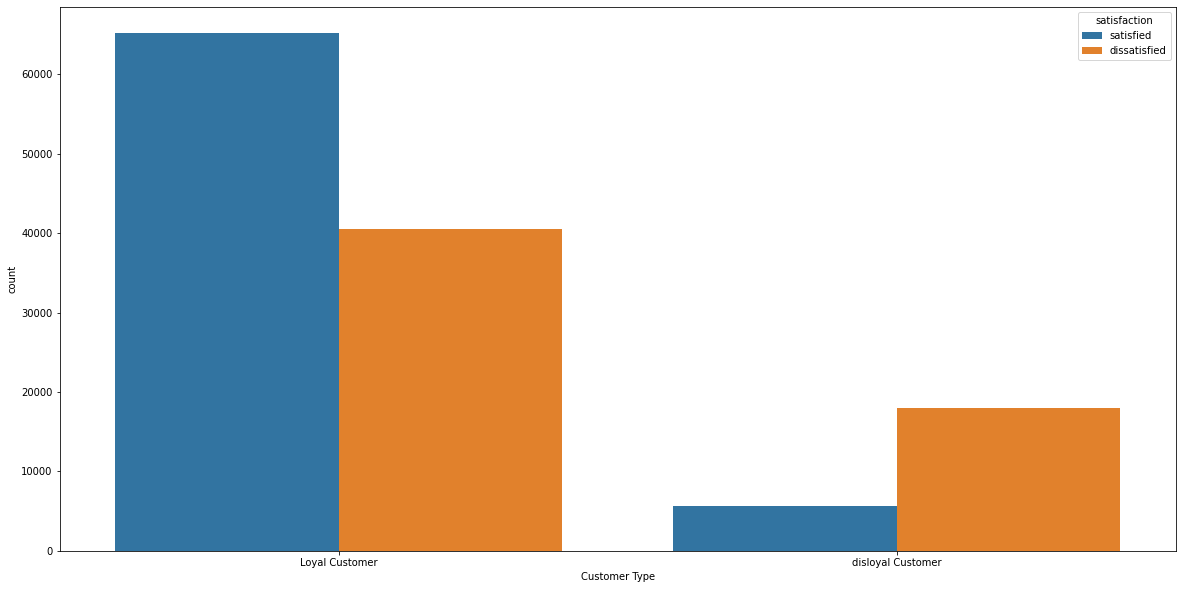

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Customer Type'],hue=data['satisfaction'])
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Customer Type', 'satisfaction'])
fig.show()

Conclusion: loyal customer express more satisfaction. however, this may because airline provides a better service to these silver/gold customers than disloyal customers.    
### Class

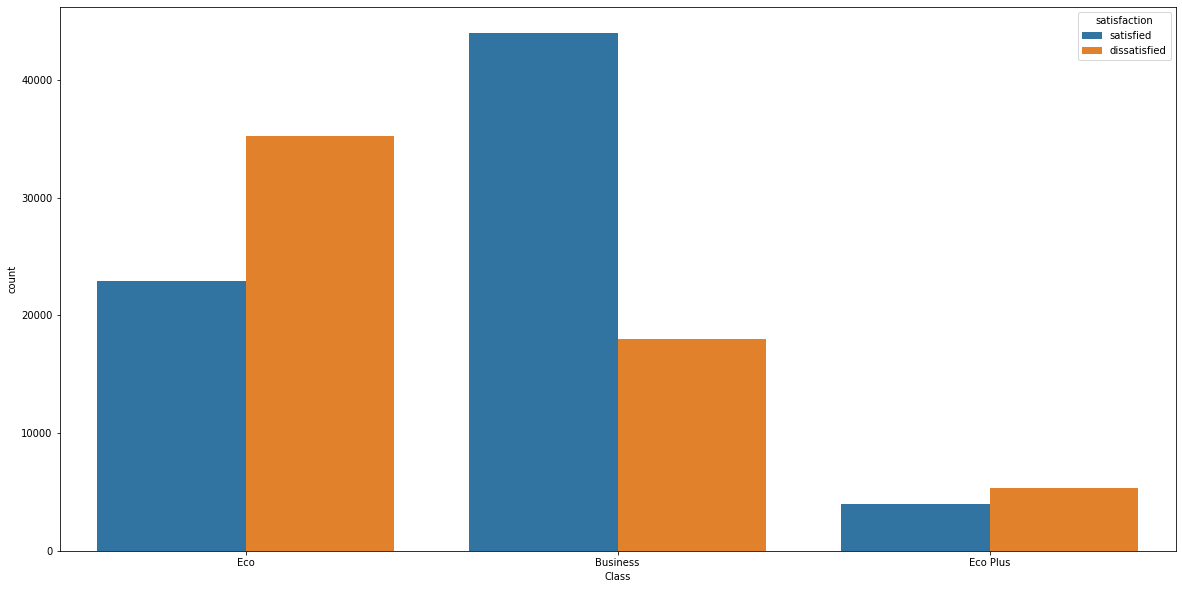

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['Class'],hue=data['satisfaction'])
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Class', 'satisfaction'])
fig.show()

Conclusion: Among the three classes Business,Eco and Eco Plus,
Business class customers express more satisfaction. It makes sense, airlines provide more exclusive services to business class customers.   
### Type of Travel

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

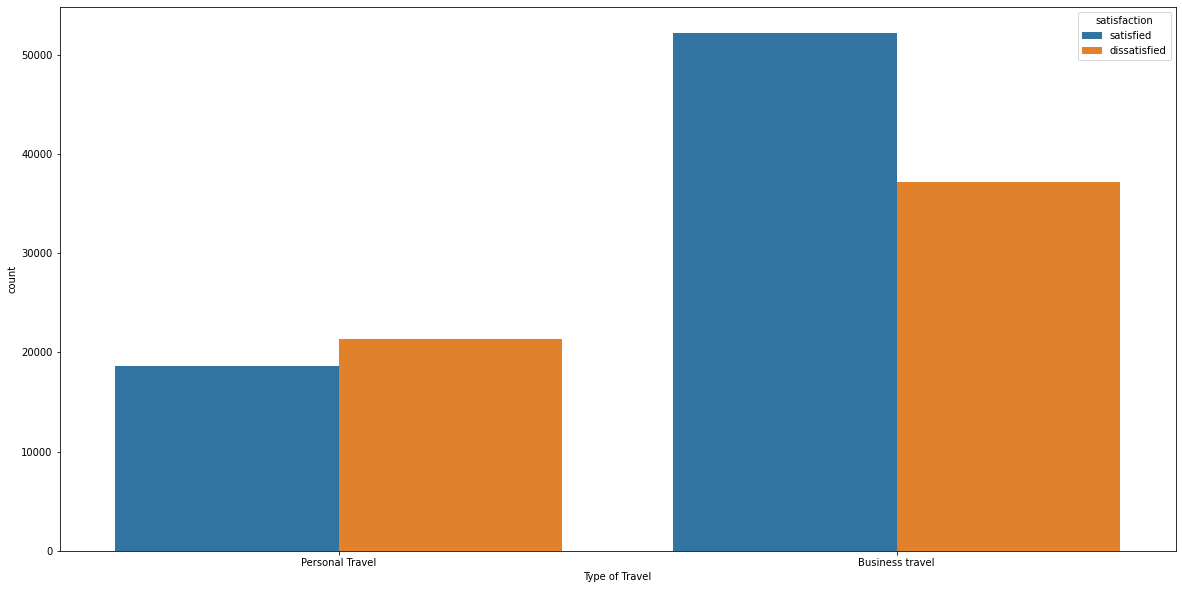

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='Type of Travel', hue="satisfaction")

People on business travel are more satisfied than people on their personal travel. However, this may because that people on business travel are taking a higher business class rather than economy class.    
Let's see whether it's true.

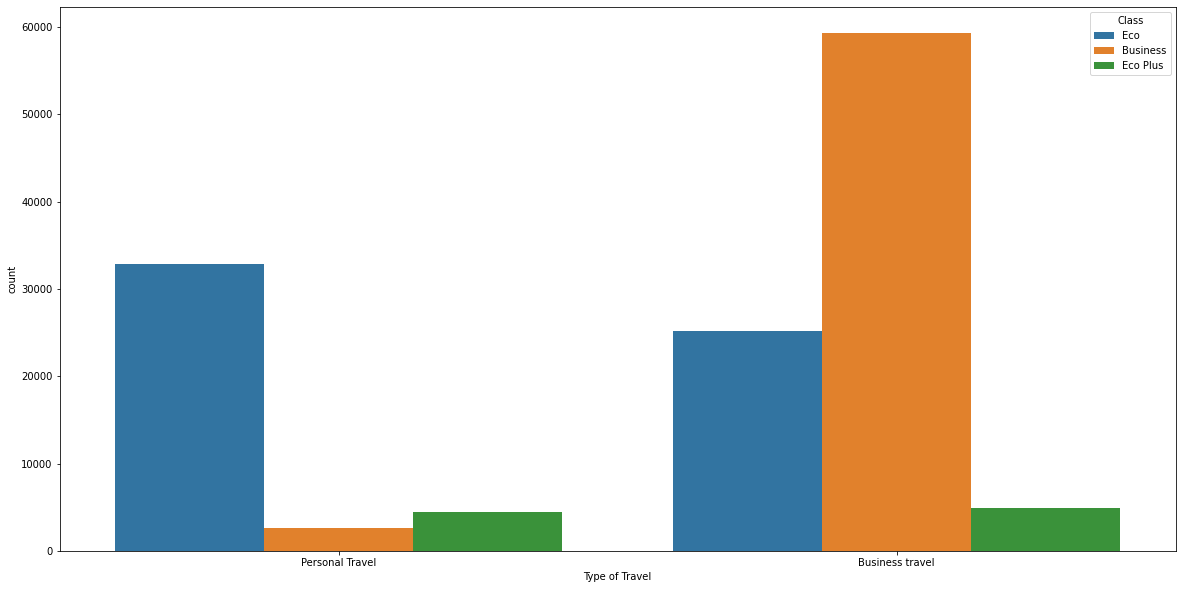

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x="Type of Travel", hue="Class")
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Type of Travel', 'Class'])
fig.show()

Conclusion: Most customers on business travel will choose business class. Personal Travel prefer the Economy Class. While some Business Traveler prefer Eco and Eco plus

Next, let's explore the relations between all numerical features.   
### Numerical features

<AxesSubplot:>

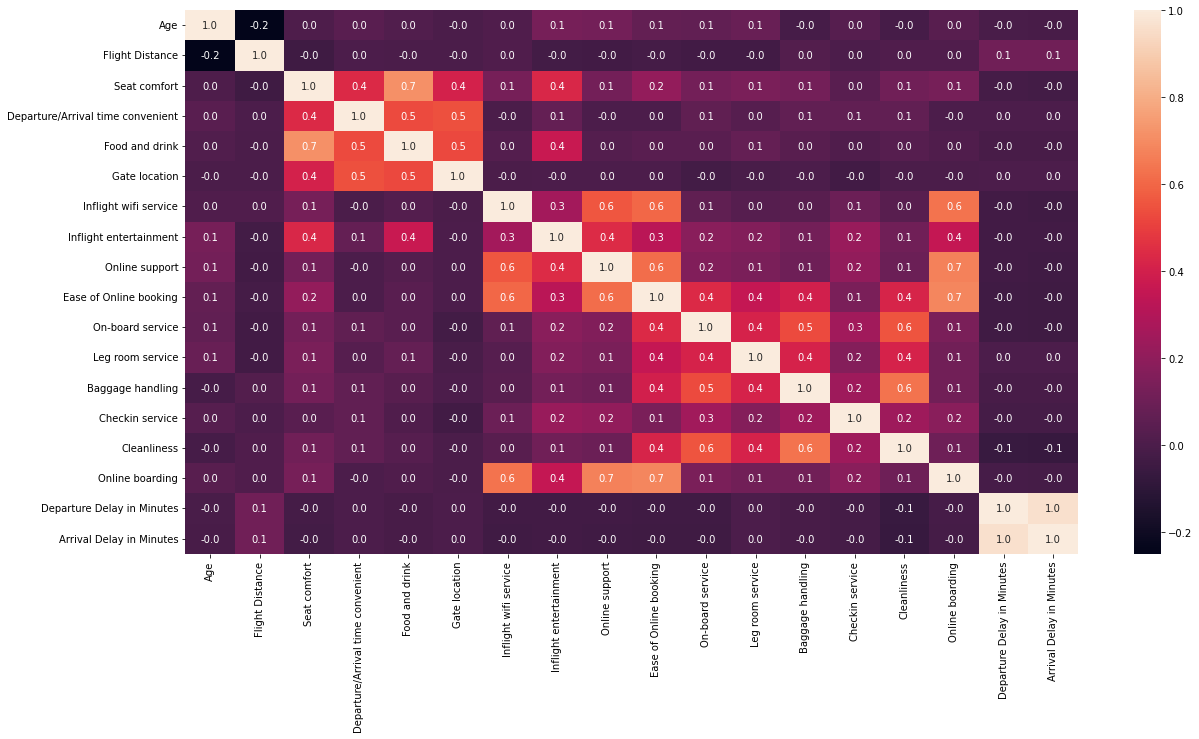

In [ ]:
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr,annot=True, fmt=".1f")

From above heatmap, we can see, `departure delay` and `arrival depaly` are highly related (1.0) . it makes sense. unless the captain is speeding, otherwise, you depart late, you arrive late.   
### Delay of Departure and Arrival

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

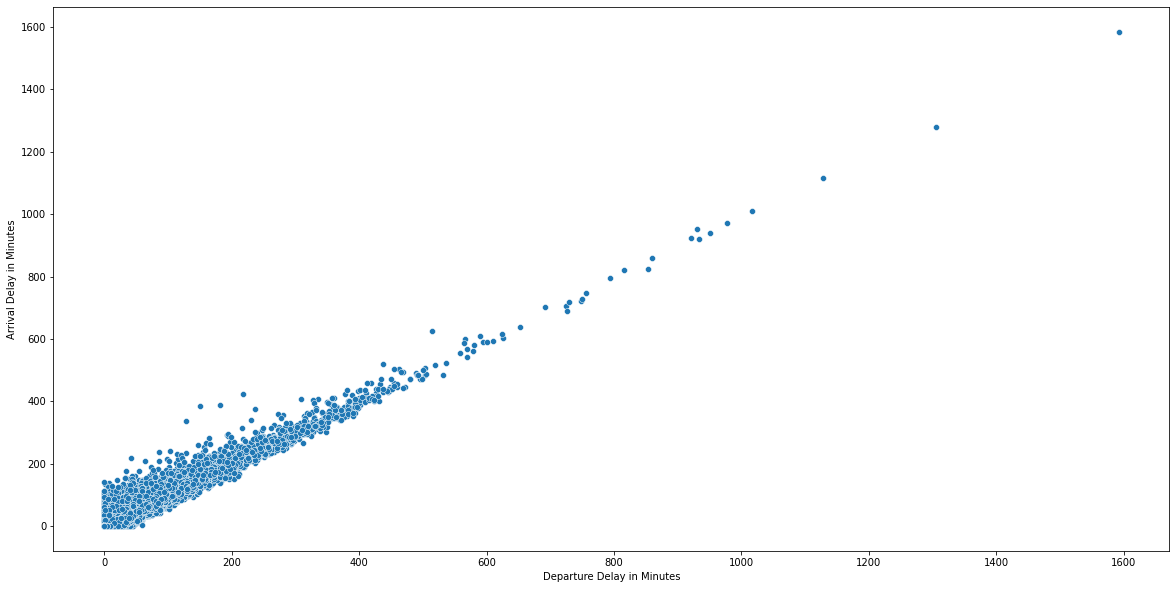

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes', )

Apart from that, `Online boarding`, `Online support` , `inflight wifi` and `Ease of Online booking` are highly realted too (0.7). This is understandable, if the airline has a terrible website or application, all the online services won't be good.

`Seat comfprt` and `food and drink` are highly related too.    
### Age

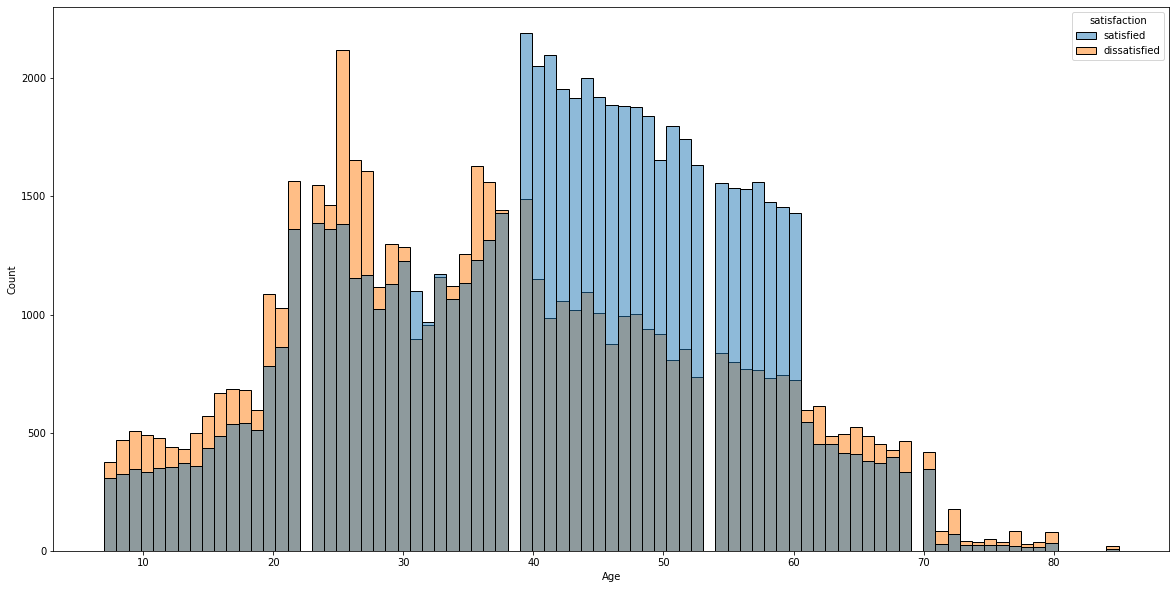

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Age'],hue=data['satisfaction'])
plt.show()

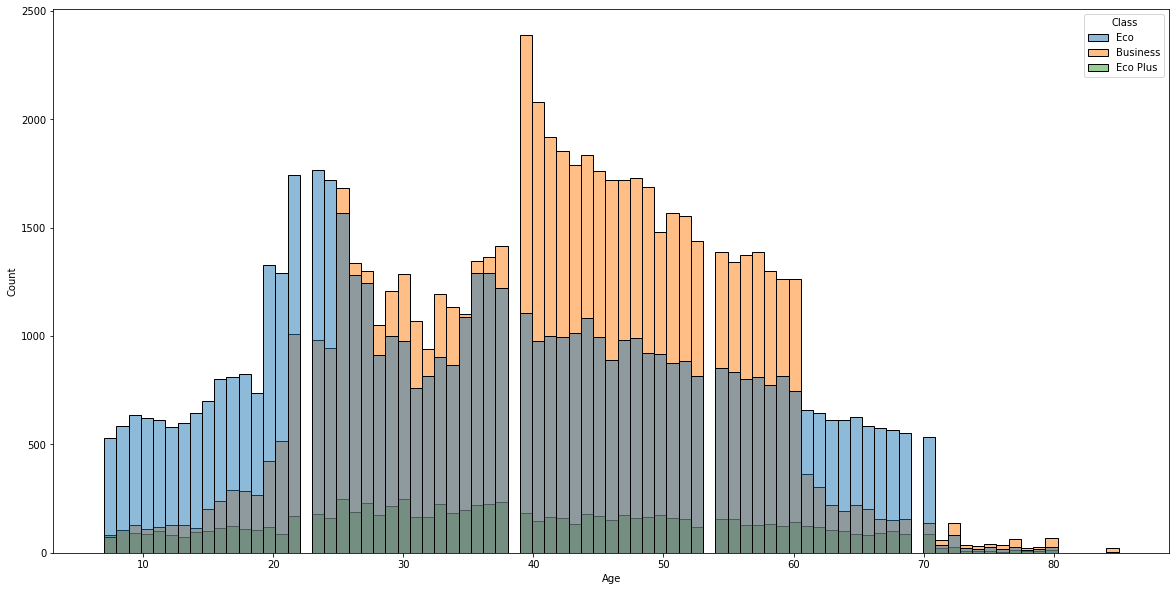

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Age'],hue=data['Class'])
plt.show()

Conclusion: young people are hard to be satisfied, as the younger age group from 10-30 do not express their satisfaction.   
### Flight Distance

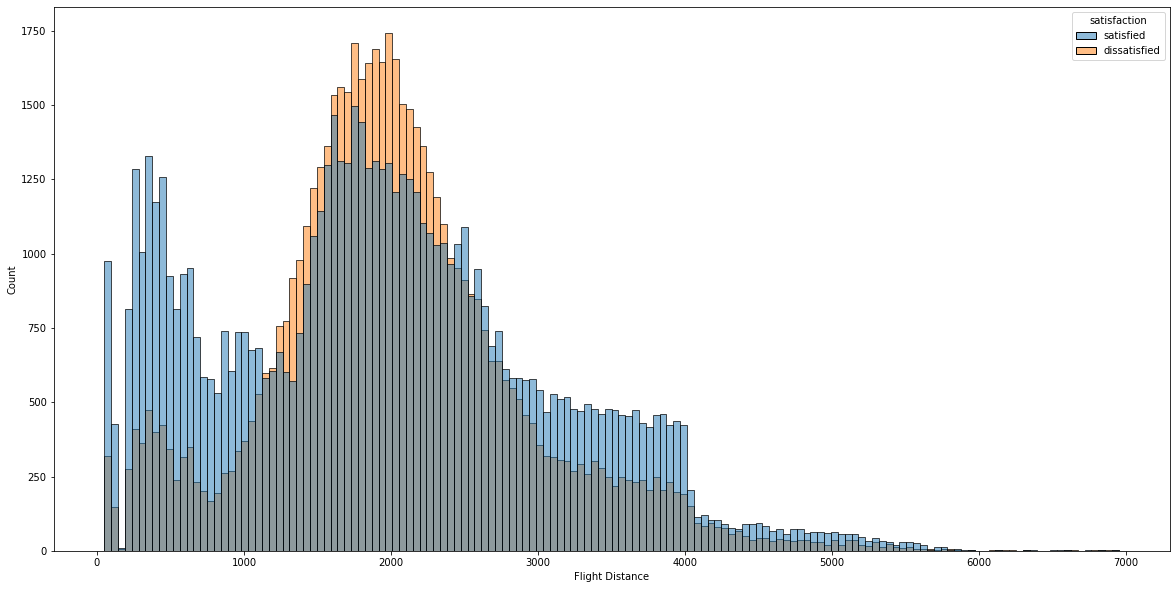

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Flight Distance'],hue=data['satisfaction'])
plt.show()

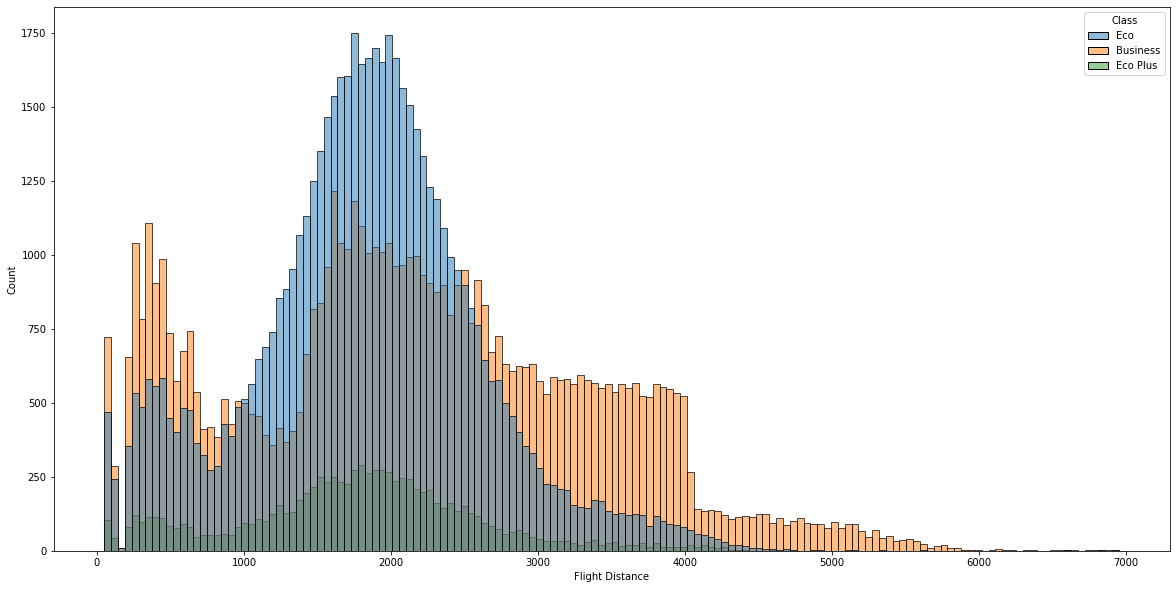

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Flight Distance'],hue=data['Class'])
plt.show()

Conclusion: customers are more likely satisfied on short and long flights. On mid-range flights, customers are more likely to express dissatisfactions.    
### Seat comfort

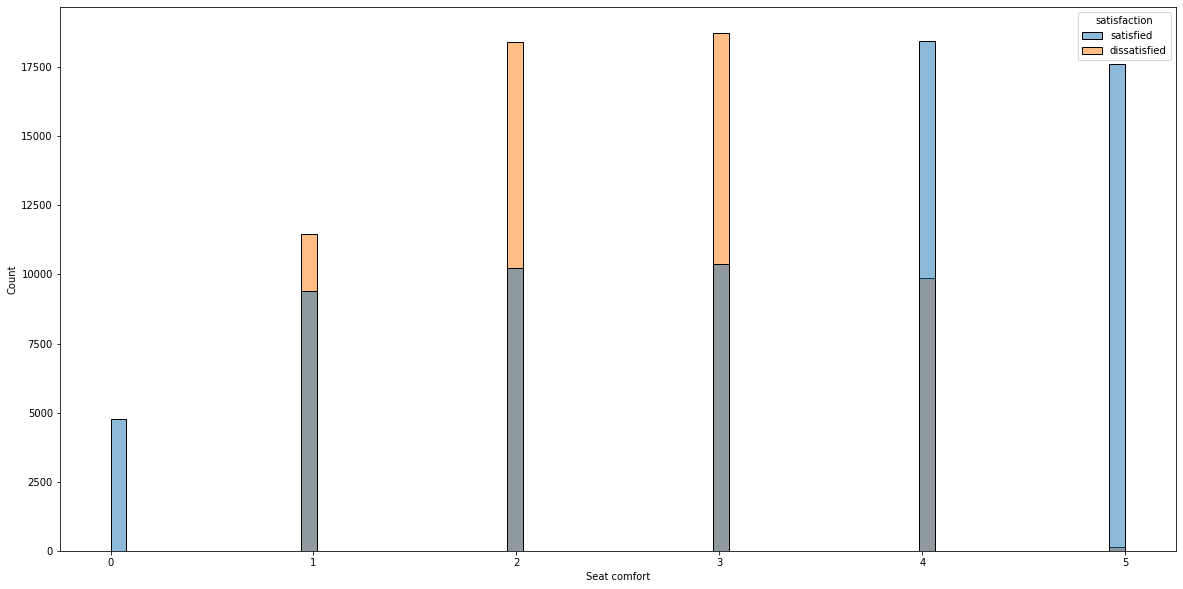

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Seat comfort'],hue=data['satisfaction'])
plt.show()

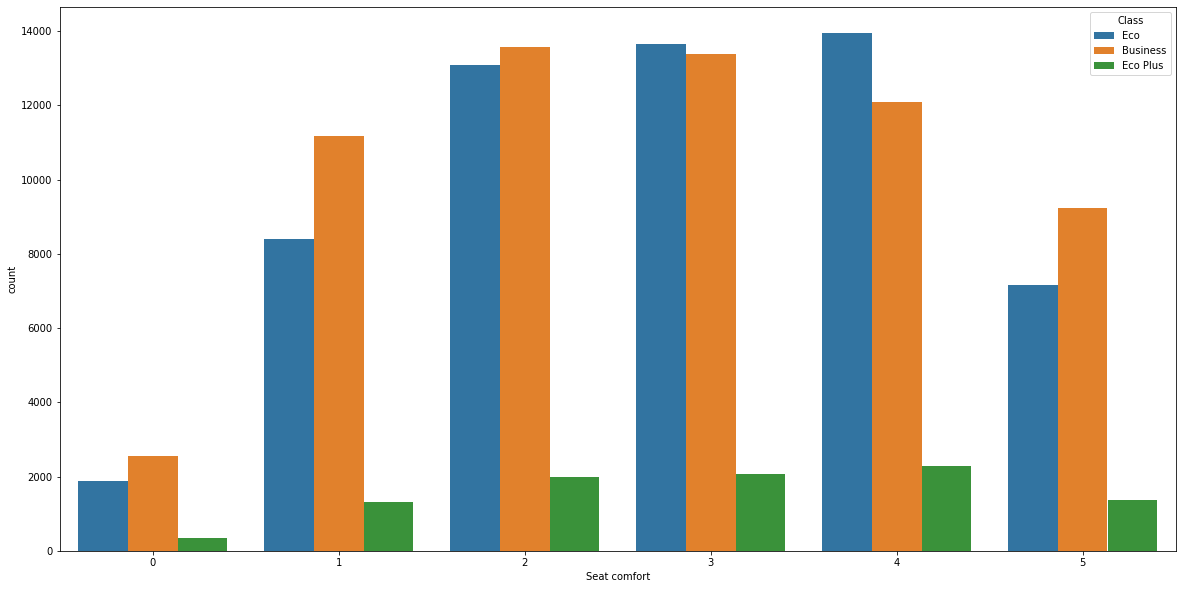

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x="Seat comfort", hue="Class")
plt.show()

Conclusion: The rating of 4 is highest among the Economy class passenger.
We can say that Business class passenger have rated 3 for the seat comfort.
Economy Plus passengers do not seem to have a mixed rating for seat comfort.

The reason for Economy Plus not having majority ratings could be (1) Expectating that seat comfort will be like business class. (2) From above pie chart many Business Travelers did choose Eco Plus Class. (3) Less number of Eco Plus Seats/ Passengers

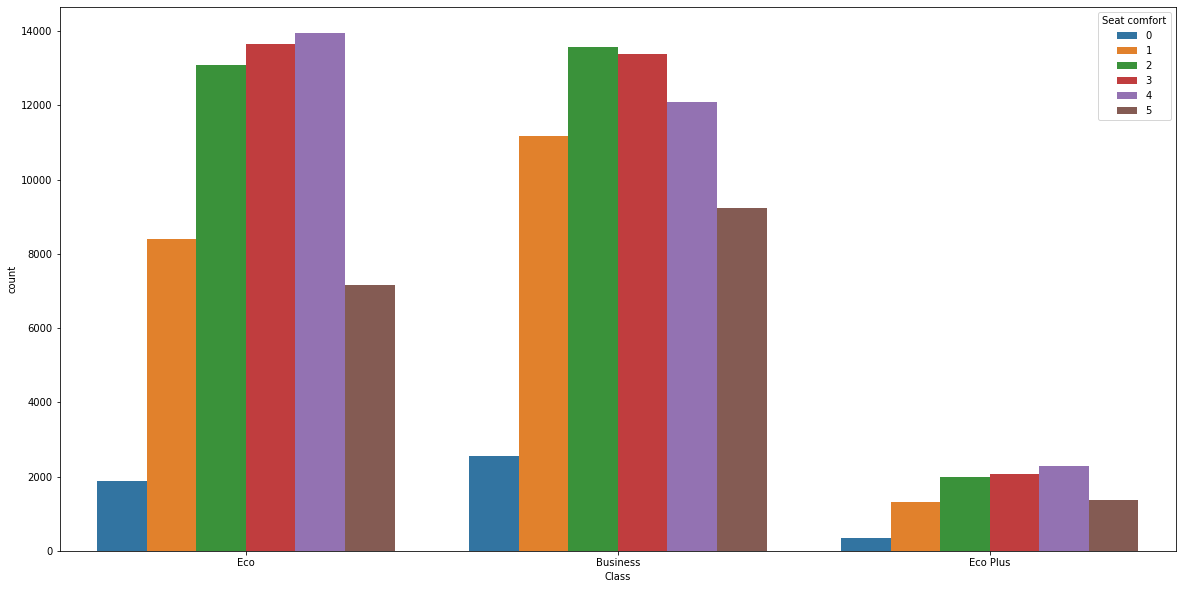

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x="Class", hue="Seat comfort")
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Class', 'Seat comfort'])
fig.show()

Conclusion: This Pie chart clearly explains that there are really less number of passengers who have choosen Eco Plus, and hence the ratings are not a complete majority.    
~~Business Class : Average rating for Seat comfort 3-4
Eco Class : Average rating for Seat comfort 2-4~~    
However, business class doesn't mean every one is happy. from above we can see, most people would rate the seat comfort a 2 while most people in eco class would rate a 4.    
### Delay

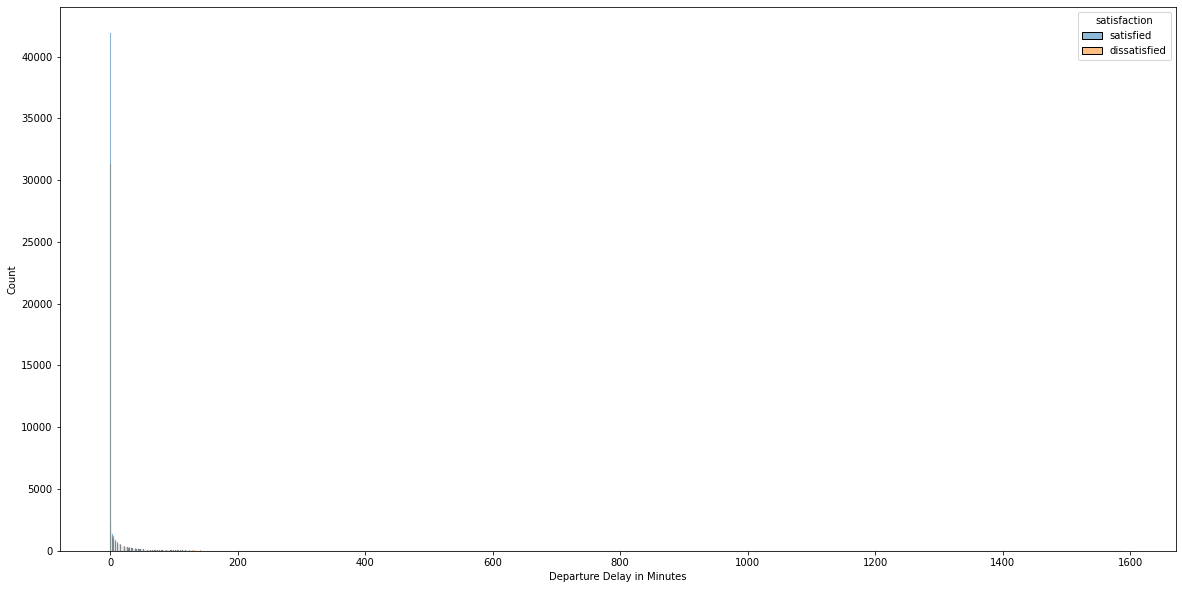

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Departure Delay in Minutes'],hue=data['satisfaction'])
plt.show()

Departure Delay in Time cloumn shows Skewness , Lets try to see what happens when we try to normalize it using log.

<AxesSubplot:xlabel='DepDlyLoged', ylabel='Count'>

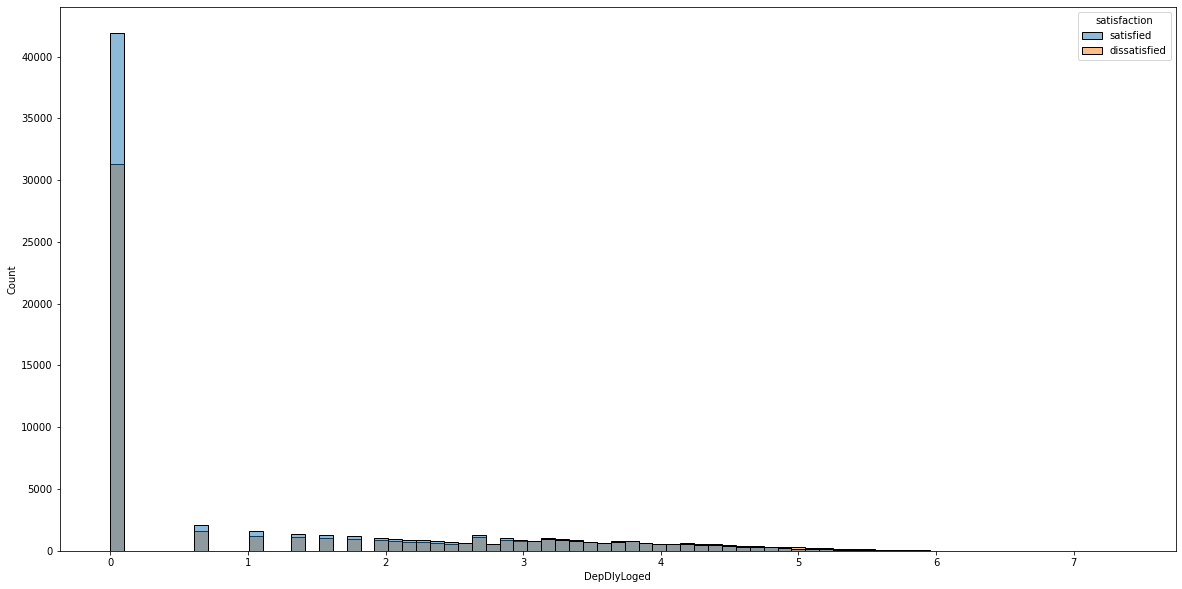

In [ ]:
data['DepDlyLoged']=np.log(1+data['Departure Delay in Minutes'])
plt.figure(figsize=(20,10))
sns.histplot(data=data, x='DepDlyLoged', hue="satisfaction")

It's still skewed after log transform, but it's much better.




In [ ]:
data.DepDlyLoged.describe()

count    129487.000000
mean          1.231098
std           1.615801
min           0.000000
25%           0.000000
50%           0.000000
75%           2.564949
max           7.373374
Name: DepDlyLoged, dtype: float64

### Redeye

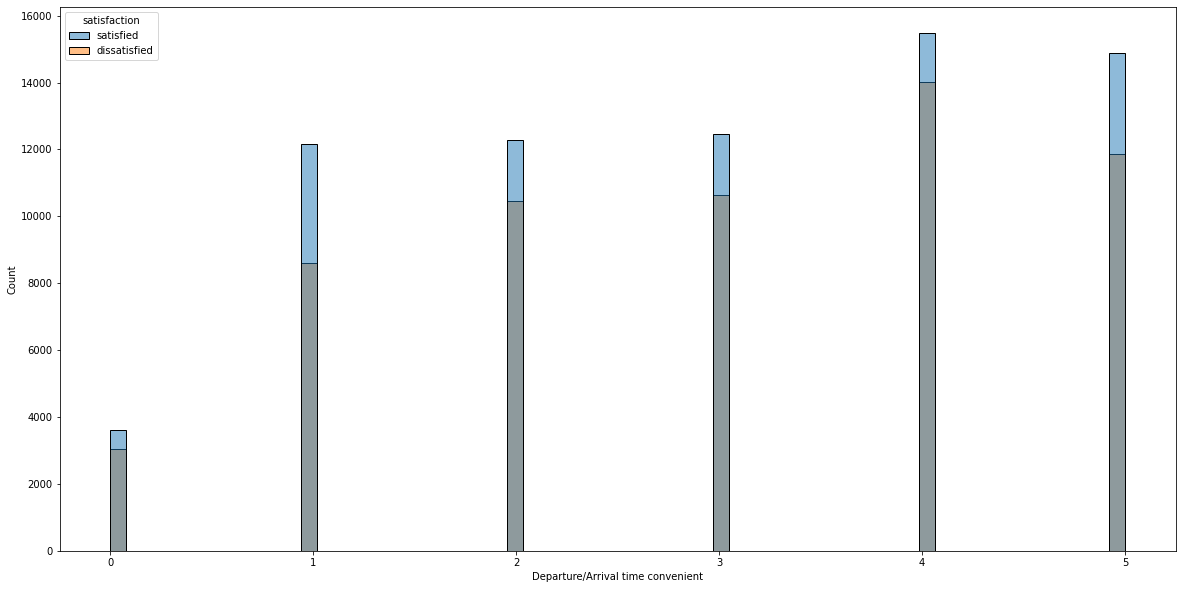

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Departure/Arrival time convenient'],hue=data['satisfaction'])
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Departure/Arrival time convenient', 'satisfaction'])
fig.show()

Conclusion: No significant pattern between `Departure/Arrival time convenient` and satisfaction.

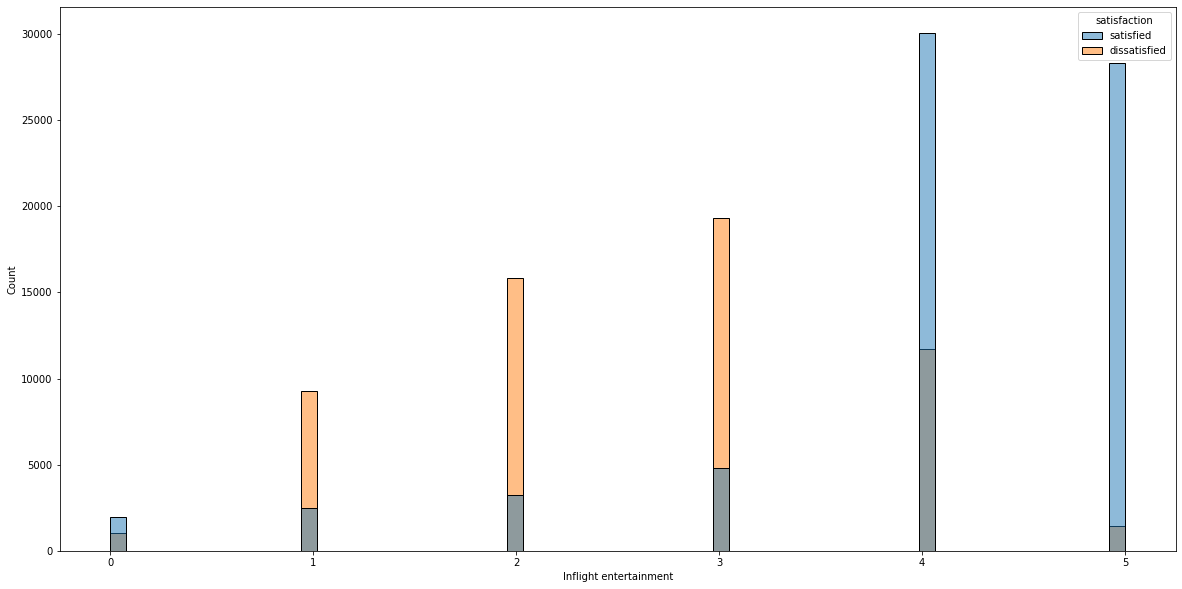

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Inflight entertainment'],hue=data['satisfaction'])
plt.show()

In [ ]:
fig = px.sunburst(data, path=['Inflight entertainment', 'satisfaction'])
fig.show()

## Feature Engineering

### Encoding

In [ ]:
# encoding the data
train = pd.get_dummies(data, drop_first=True)
train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,DepDlyLoged,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,2,0,0.0,0.000000,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,2,310,305.0,5.739793,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,2,0,0.0,0.000000,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,3,0,0.0,0.000000,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,5,0,0.0,0.000000,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,29,1731,5,5,5,3,2,5,2,2,...,2,0,0.0,0.000000,1,0,1,1,1,0
129483,63,2087,2,3,2,4,2,1,1,3,...,1,174,172.0,5.164786,0,1,1,1,0,0
129484,69,2320,3,0,3,3,3,2,2,4,...,2,155,163.0,5.049856,0,1,1,1,1,0
129485,66,2450,3,2,3,2,3,2,2,3,...,2,193,205.0,5.267858,0,1,1,1,1,0


### Log transform   
We did it on above

### Feature selection
* Delay. Previously we showed that depature delay and arrival depay are highly related. we can drop one of them.
* Delay in minutes. we can drop it and use the log transformed one `DepDlyLoged` instead.


In [ ]:
train.drop(['Arrival Delay in Minutes', 'Departure Delay in Minutes'], axis=1, inplace=True)
train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,DepDlyLoged,satisfaction_satisfied,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0.000000,1,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,5.739793,1,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0.000000,1,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0.000000,1,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0.000000,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,29,1731,5,5,5,3,2,5,2,2,...,4,4,2,0.000000,1,0,1,1,1,0
129483,63,2087,2,3,2,4,2,1,1,3,...,1,2,1,5.164786,0,1,1,1,0,0
129484,69,2320,3,0,3,3,3,2,2,4,...,2,3,2,5.049856,0,1,1,1,1,0
129485,66,2450,3,2,3,2,3,2,2,3,...,2,1,2,5.267858,0,1,1,1,1,0


### Standardize

In [ ]:
# scale
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

y = train.satisfaction_satisfied
X = train.drop('satisfaction_satisfied', axis=1)
X_columns = X.columns
X = std.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=X_columns)
X

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,DepDlyLoged,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1.691495,-1.671090,-2.037943,-1.958042,-1.975658,-0.758380,-0.947223,0.457857,-1.163548,-0.361660,...,-0.601358,1.316301,-0.612919,-1.041526,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458
1,0.500825,0.470348,-2.037943,-1.958042,-1.975658,0.007368,-2.463800,-1.028077,-1.163548,-0.361660,...,0.263333,-1.063601,-0.612919,-1.041526,2.790389,1.014931,-0.473495,1.494583,-0.902389,-0.279458
2,-1.615922,0.152882,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,-2.514012,-1.163548,-1.127610,...,0.263333,0.523000,0.255379,-1.041526,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458
3,1.360753,-1.322461,-2.037943,-1.958042,-1.975658,0.007368,-0.188935,0.457857,-0.398040,-1.893560,...,-2.330739,0.523000,-2.349514,-0.271477,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458
4,2.022237,-1.584420,-2.037943,-1.958042,-1.975658,0.007368,0.569353,-0.285110,0.367469,-1.127610,...,-1.466048,0.523000,-1.481216,1.268621,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,-0.689845,-0.243465,1.551772,1.315972,1.487949,0.007368,-0.947223,1.200825,-1.163548,-1.127610,...,0.263333,0.523000,0.255379,-1.041526,-0.761915,-0.985288,2.111957,1.494583,1.108170,-0.279458
129483,1.559198,0.103217,-0.602057,0.006367,-0.590215,0.773117,-0.947223,-1.771045,-1.929057,-0.361660,...,-0.601358,-1.856902,-1.481216,-1.811575,2.434523,1.014931,2.111957,1.494583,-0.902389,-0.279458
129484,1.956088,0.330117,0.115886,-1.958042,0.102506,0.007368,-0.188935,-1.028077,-1.163548,0.404291,...,0.263333,-1.063601,-0.612919,-1.041526,2.363394,1.014931,2.111957,1.494583,1.108170,-0.279458
129485,1.757643,0.456714,0.115886,-0.648436,0.102506,-0.758380,-0.188935,-1.028077,-1.163548,-0.361660,...,-0.601358,-1.063601,-2.349514,-1.041526,2.498313,1.014931,2.111957,1.494583,1.108170,-0.279458


In [ ]:
y

0         1
1         1
2         1
3         1
4         1
         ..
129482    1
129483    0
129484    0
129485    0
129486    0
Name: satisfaction_satisfied, Length: 129487, dtype: uint8

## Model

In [ ]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
new_train = pd.concat([X,y], axis=1)
new_train

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,DepDlyLoged,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.691495,-1.671090,-2.037943,-1.958042,-1.975658,-0.758380,-0.947223,0.457857,-1.163548,-0.361660,...,1.316301,-0.612919,-1.041526,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458,1
1,0.500825,0.470348,-2.037943,-1.958042,-1.975658,0.007368,-2.463800,-1.028077,-1.163548,-0.361660,...,-1.063601,-0.612919,-1.041526,2.790389,1.014931,-0.473495,1.494583,-0.902389,-0.279458,1
2,-1.615922,0.152882,-2.037943,-1.958042,-1.975658,0.007368,-0.947223,-2.514012,-1.163548,-1.127610,...,0.523000,0.255379,-1.041526,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458,1
3,1.360753,-1.322461,-2.037943,-1.958042,-1.975658,0.007368,-0.188935,0.457857,-0.398040,-1.893560,...,0.523000,-2.349514,-0.271477,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458,1
4,2.022237,-1.584420,-2.037943,-1.958042,-1.975658,0.007368,0.569353,-0.285110,0.367469,-1.127610,...,0.523000,-1.481216,1.268621,-0.761915,-0.985288,-0.473495,1.494583,1.108170,-0.279458,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,-0.689845,-0.243465,1.551772,1.315972,1.487949,0.007368,-0.947223,1.200825,-1.163548,-1.127610,...,0.523000,0.255379,-1.041526,-0.761915,-0.985288,2.111957,1.494583,1.108170,-0.279458,1
129483,1.559198,0.103217,-0.602057,0.006367,-0.590215,0.773117,-0.947223,-1.771045,-1.929057,-0.361660,...,-1.856902,-1.481216,-1.811575,2.434523,1.014931,2.111957,1.494583,-0.902389,-0.279458,0
129484,1.956088,0.330117,0.115886,-1.958042,0.102506,0.007368,-0.188935,-1.028077,-1.163548,0.404291,...,-1.063601,-0.612919,-1.041526,2.363394,1.014931,2.111957,1.494583,1.108170,-0.279458,0
129485,1.757643,0.456714,0.115886,-0.648436,0.102506,-0.758380,-0.188935,-1.028077,-1.163548,-0.361660,...,-1.063601,-2.349514,-1.041526,2.498313,1.014931,2.111957,1.494583,1.108170,-0.279458,0


In [ ]:
# setup data
from pycaret.classification import *
s = setup(new_train, target = 'satisfaction_satisfied')

,Description,Value
0,Session id,4171
1,Target,satisfaction_satisfied
2,Target type,Binary
3,Original data shape,"(129487, 23)"
4,Transformed data shape,"(129487, 23)"
5,Transformed train set shape,"(90640, 23)"
6,Transformed test set shape,"(38847, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare models and get the best
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9565,0.9936,0.9535,0.9666,0.9600,0.9124,0.9125,7.6920
rf,Random Forest Classifier,0.9560,0.9926,0.9524,0.9668,0.9595,0.9114,0.9115,7.7610
et,Extra Trees Classifier,0.9543,0.9921,0.9520,0.9640,0.9580,0.9078,0.9079,6.6330
lightgbm,Light Gradient Boosting Machine,0.9543,0.9930,0.9513,0.9648,0.9580,0.9080,0.9081,1.2790
dt,Decision Tree Classifier,0.9356,0.9350,0.9422,0.9404,0.9413,0.8701,0.8701,0.4530
gbc,Gradient Boosting Classifier,0.9248,0.9809,0.9333,0.9296,0.9314,0.8481,0.8481,9.5980
knn,K Neighbors Classifier,0.9198,0.9689,0.9074,0.9439,0.9253,0.8388,0.8395,7.0900
ada,Ada Boost Classifier,0.8987,0.9635,0.9029,0.9113,0.9071,0.7958,0.7959,2.4610
ridge,Ridge Classifier,0.8357,0.0000,0.8507,0.8495,0.8501,0.6685,0.6685,0.0870
lda,Linear Discriminant Analysis,0.8357,0.9083,0.8506,0.8495,0.8501,0.6684,0.6684,0.4210


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Result
* Confusion Matrix   
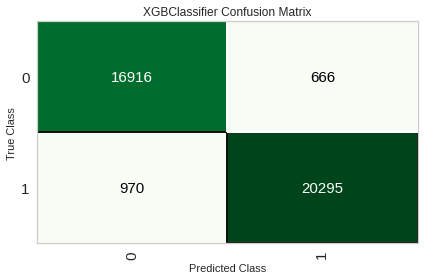
* Feature Importance   
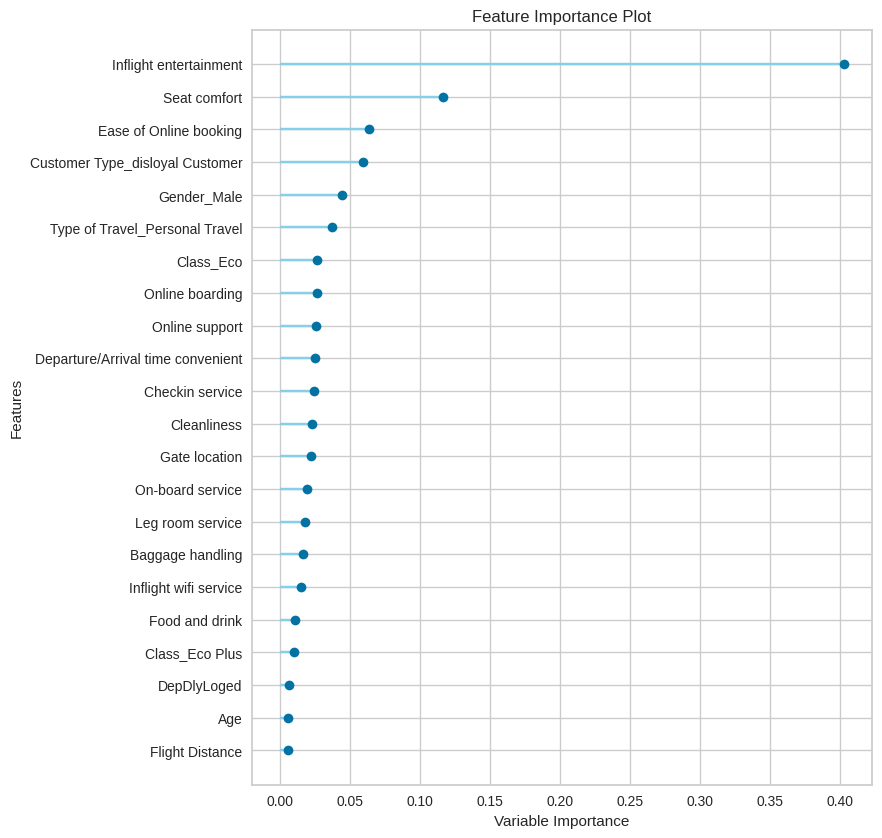


## Interpretation of Model
Top 3 important features are **["Inflight entertainment", "Seat comfort", "Ease of Online booking"]**.   

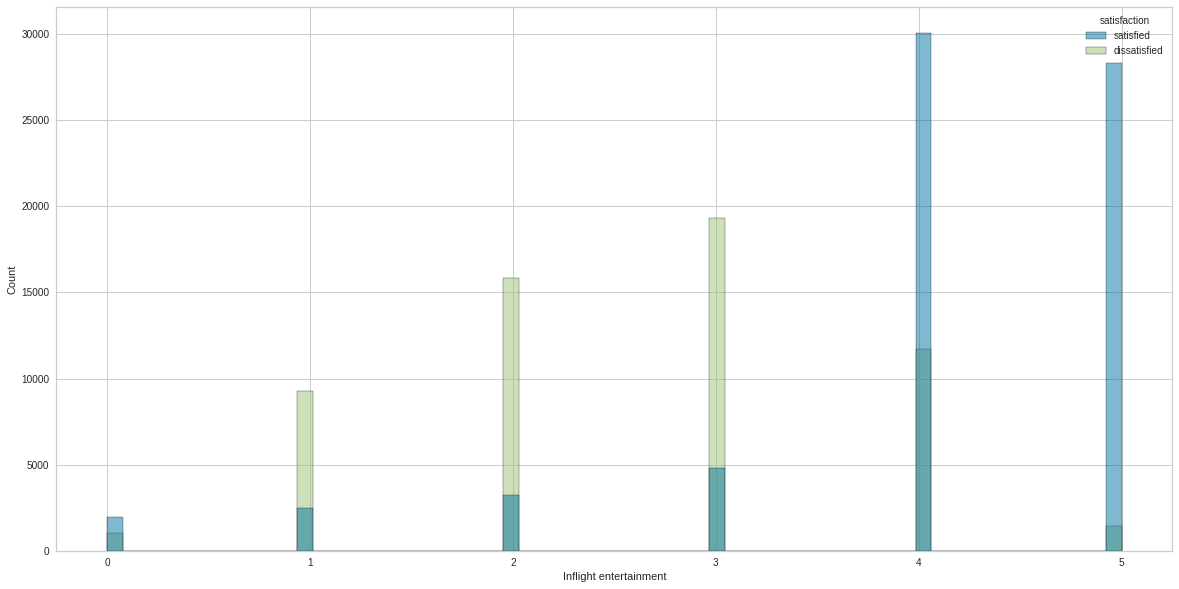

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Inflight entertainment'],hue=data['satisfaction'])
plt.show()

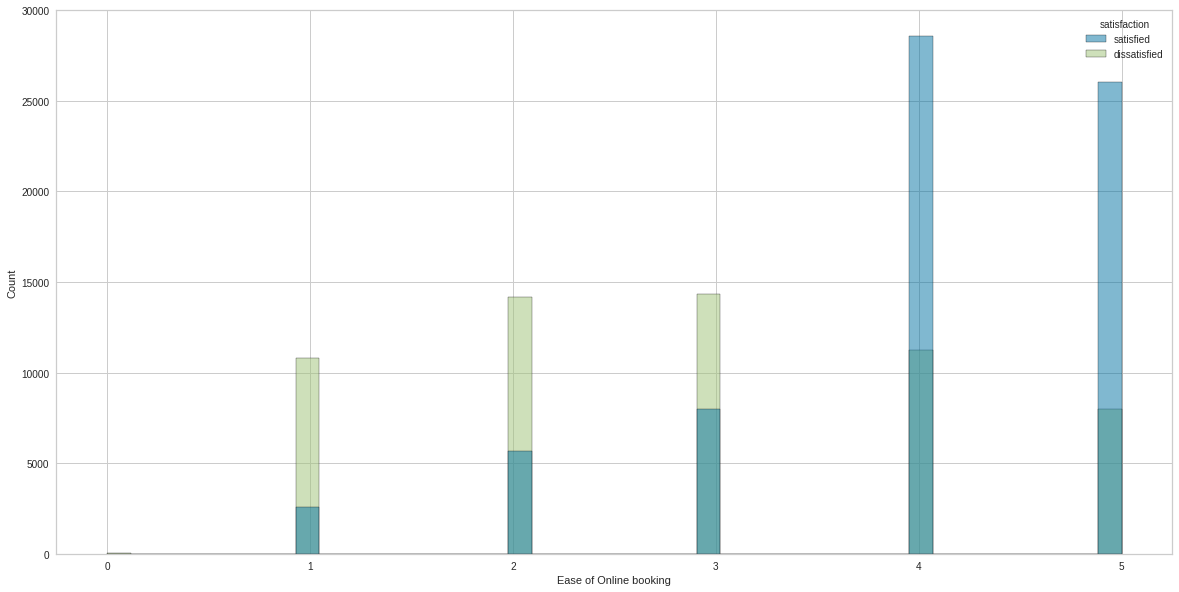

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(x=data['Ease of Online booking'],hue=data['satisfaction'])
plt.show()

We came across the Airlines Data on Kaggle, as we looked at the data and its columns , we could understand that this data tells us about the customer satisfaction based on their experience of air travel.
As a group of international students we ourselves have travelled long flights for about 20-24 hours and we could relate with the data provided as it provides the ratings for the inflight arrangements like Class, Seat Comfort , in flight entertainment, Food and Drinks, Leg room, Cleanliness.
Also the data tells us about the factors like Checkin Service , online boating Arrival - Departure delay, Gate locations.
The entire data  shows that there are more number of Satisfied customers than the dissatisfied customers. Out of the satisfied passenger more number of Female passengers are satisfied. Also the airlines data classify the customers as loyal and disloyal, loyal customers have a higher satisfaction count. There are three classes defined, Economy , Economy Plus and Business Class. Business Class customers have higher satisfaction count. Also the passengers who are on Business Travel are more satisfied than the passengers who are on a personal travel. Most of the Business Travel customers use Business class.

The rating of 4 is highest among the Economy class passenger for the seat comfort. We can say that Business class passenger have rated 3 for the seat comfort. Economy Plus passengers do not seem to have a mixed rating for seat comfort.
The reason for Economy Plus not having majority ratings could be (1) Expectating that seat comfort will be like business class. (2) From above pie chart many Business Travelers did choose Eco Plus Class. (3) Less number of Eco Plus Seats/ Passengers

By drawing a correlation matrix, it is easier to find out which columns are related. Arrival Time Delay is highly correlated with Departure Time Delay. Customers are more likely to be satisfied on short and long range flights.

Based on the above data exploration, we created the models and compared them . XGBClassifier showed the highest accuracy.
Inflight entertainment, Seat comfort, Ease of Online booking
Are the major 3 features of importance in this model.
These 3 factors can be of more focus and can be used by airlines to improve so that they could target more customer satisfaction.

In [ ]:
fig = px.sunburst(data, path=['On-board service', 'Cleanliness'])
fig.show()
#On board service has higher correlation with Cleanliness, when plotted we can see the same, the highest rating is 4 for on-board service and Cleanliness
#We can say that the airlines are very particular about the cleanliness and service as passenger health is a priority.

In [ ]:
fig = px.sunburst(data, path=['Class', 'Gender','satisfaction'])
fig.show()
#The chart shows that most of the femal passengers Choose to fly Economy class and they were satisfied .
#on the other hand most male passengers flew in economy class and they were dissatisfied

In [ ]:
fig = px.sunburst(data, path=['Ease of Online booking', 'Online support'])
fig.show()

#The ratings show that online booking service of the airlines is good with rating of 4 and also their online support, which might be needed in case of cancellations or refunds.
#this means passengers can rely on the airlines website for assistance.

In [ ]:
fig = px.sunburst(data, path=['Online boarding', 'Online support'])
fig.show()

#The ratings show that online bparding service of the airlines is good with rating of 4 and also their online support, which might be needed in case of cancellations or refunds.
#this means passengers can rely on the airlines website for assistance.

In [ ]:
fig = px.sunburst(data, path=['Inflight entertainment','satisfaction'])
fig.show()

#Inflight entertainment is the most important feature as the passengers who have rated it high, are satisfied